In [1]:
# Import the packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import the dataset 
df = pd.read_csv('penguins.csv').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


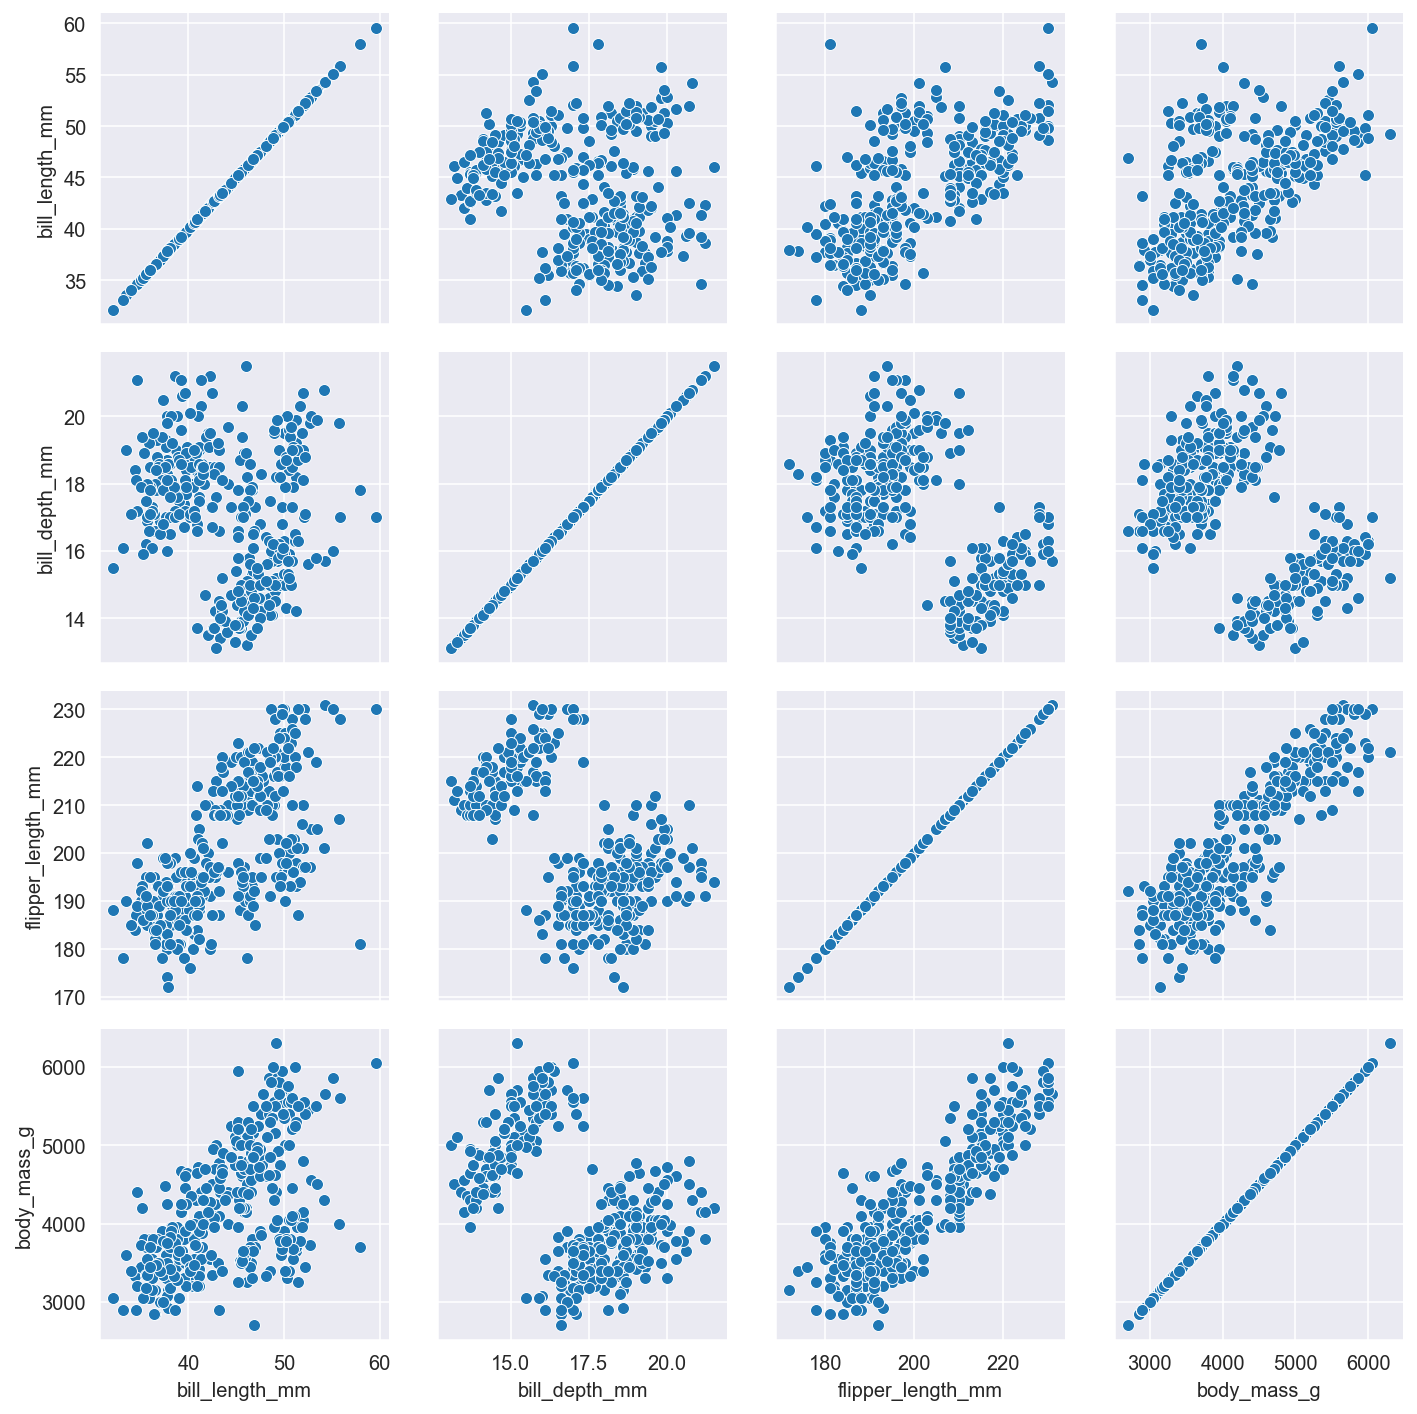

In [3]:
# Visualize the correlation your data and identify variables for further clustering
sns.PairGrid(df).map(sns.scatterplot);

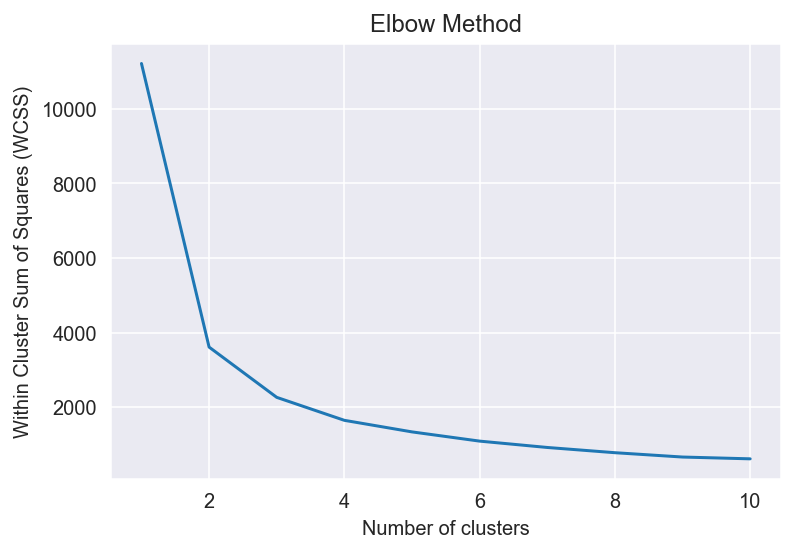

In [4]:
X = np.array(df.loc[:,['bill_length_mm', 'bill_depth_mm']]).reshape(-1, 2)

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                              
plt.xlabel('Number of clusters')                        
plt.ylabel('Within Cluster Sum of Squares (WCSS)')     
plt.show()

In [5]:
# Creating a simple model
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300,n_init = 10)
pred_y = kmeans.fit_predict(X) # Fitting the data

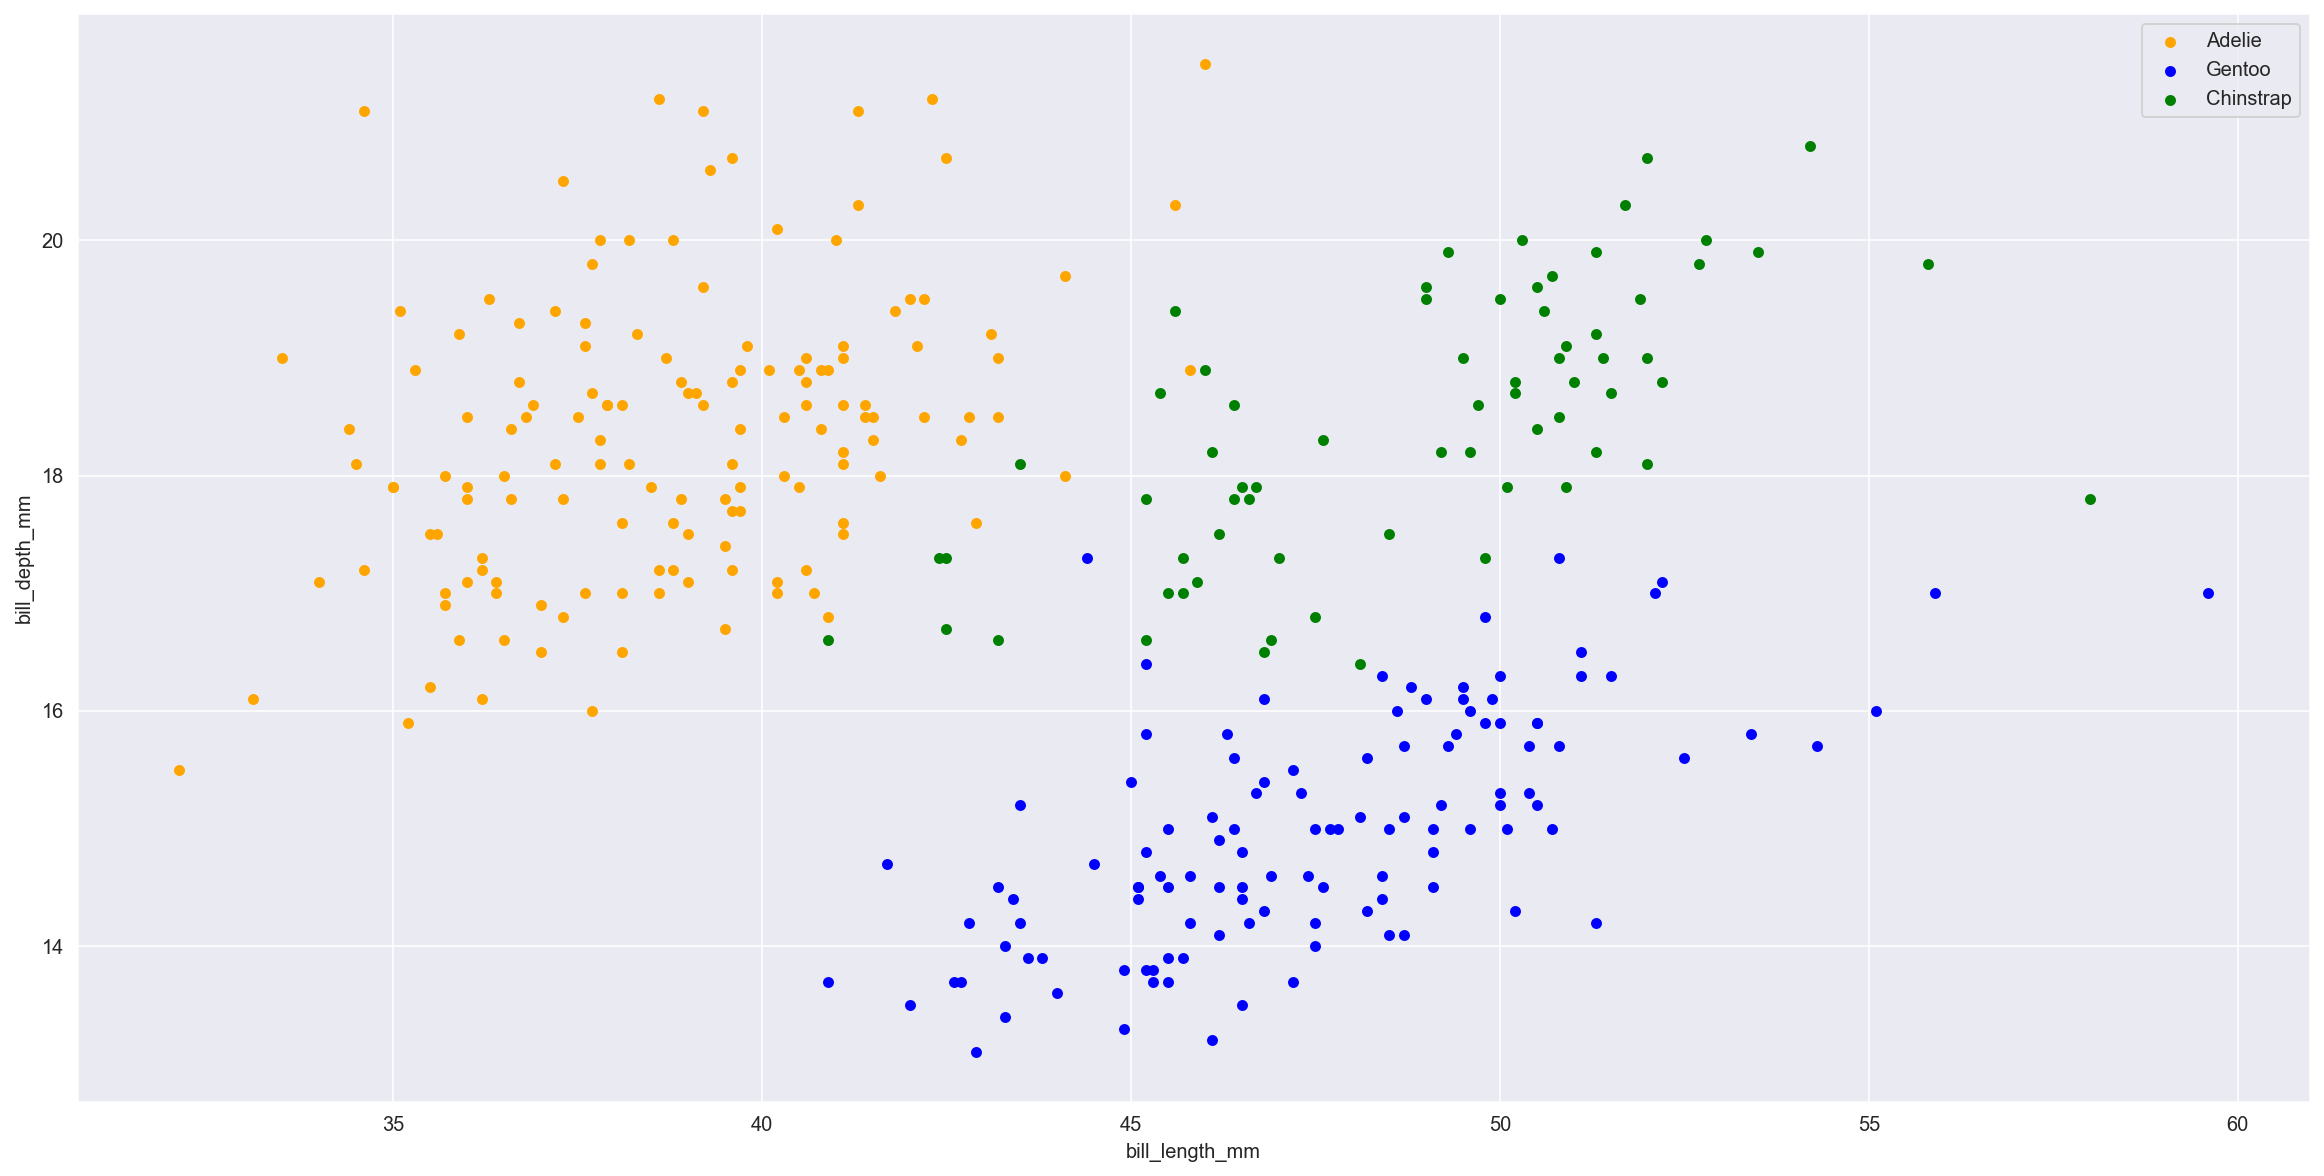

In [6]:
# Plotting the data
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1)
fig.set_size_inches(20,10)

df[df.species=='Adelie'].plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',color='orange', label='Adelie', ax = ax1)
df[df.species=='Gentoo'].plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',color='blue', label='Gentoo',ax=ax1)
df[df.species=='Chinstrap'].plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',color='green', label='Chinstrap', ax=ax1)

plt.show()

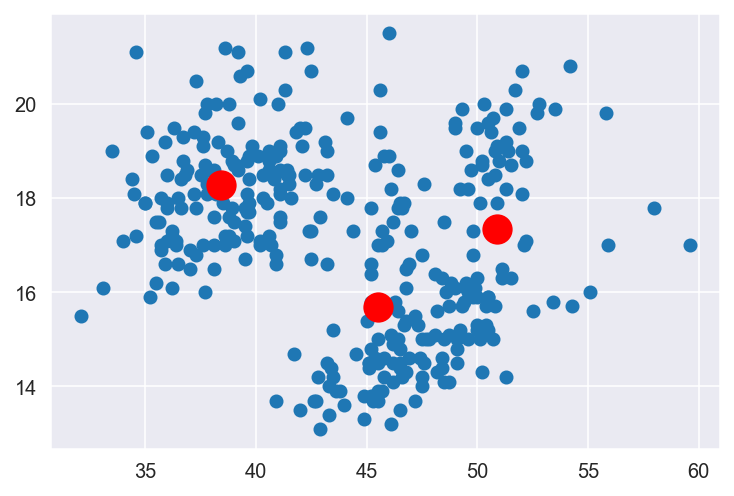

In [7]:
# Plot the data
plt.scatter(X[:,0],X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

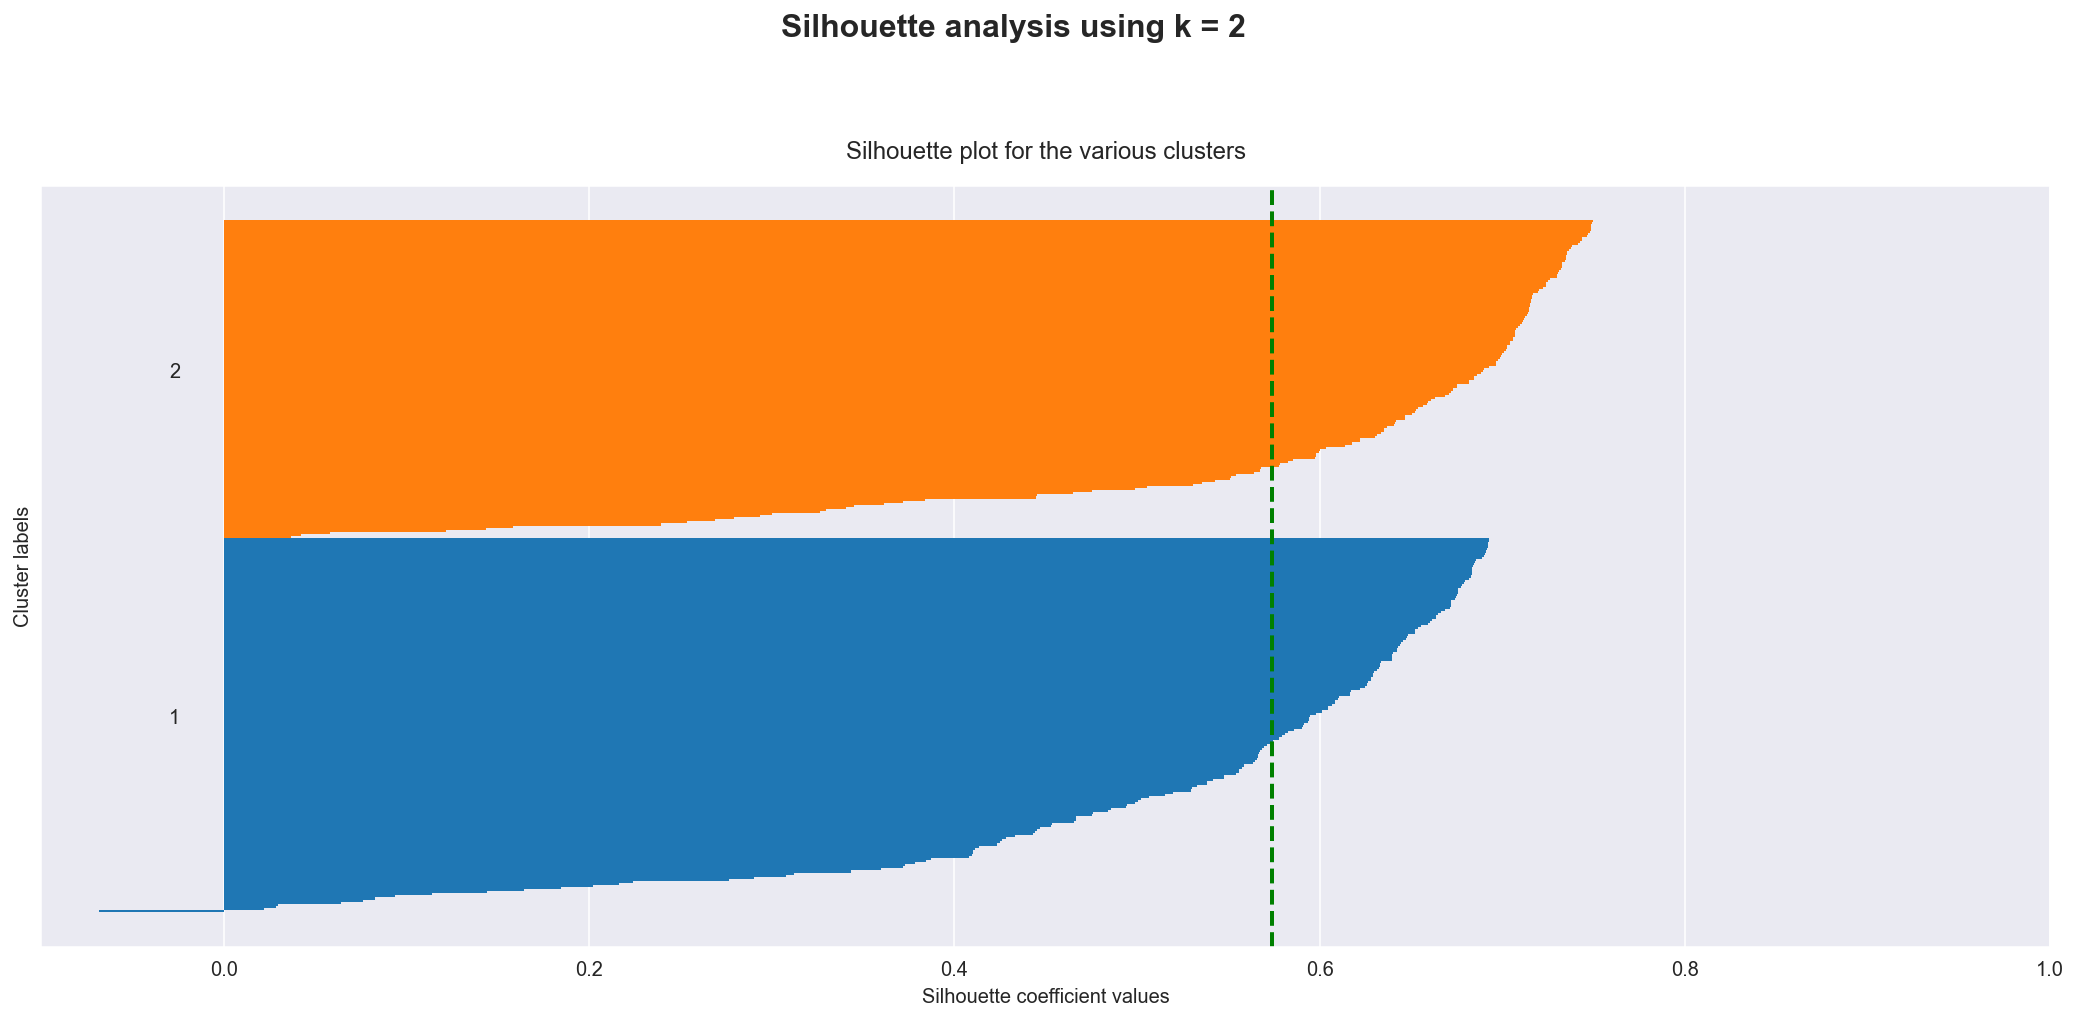

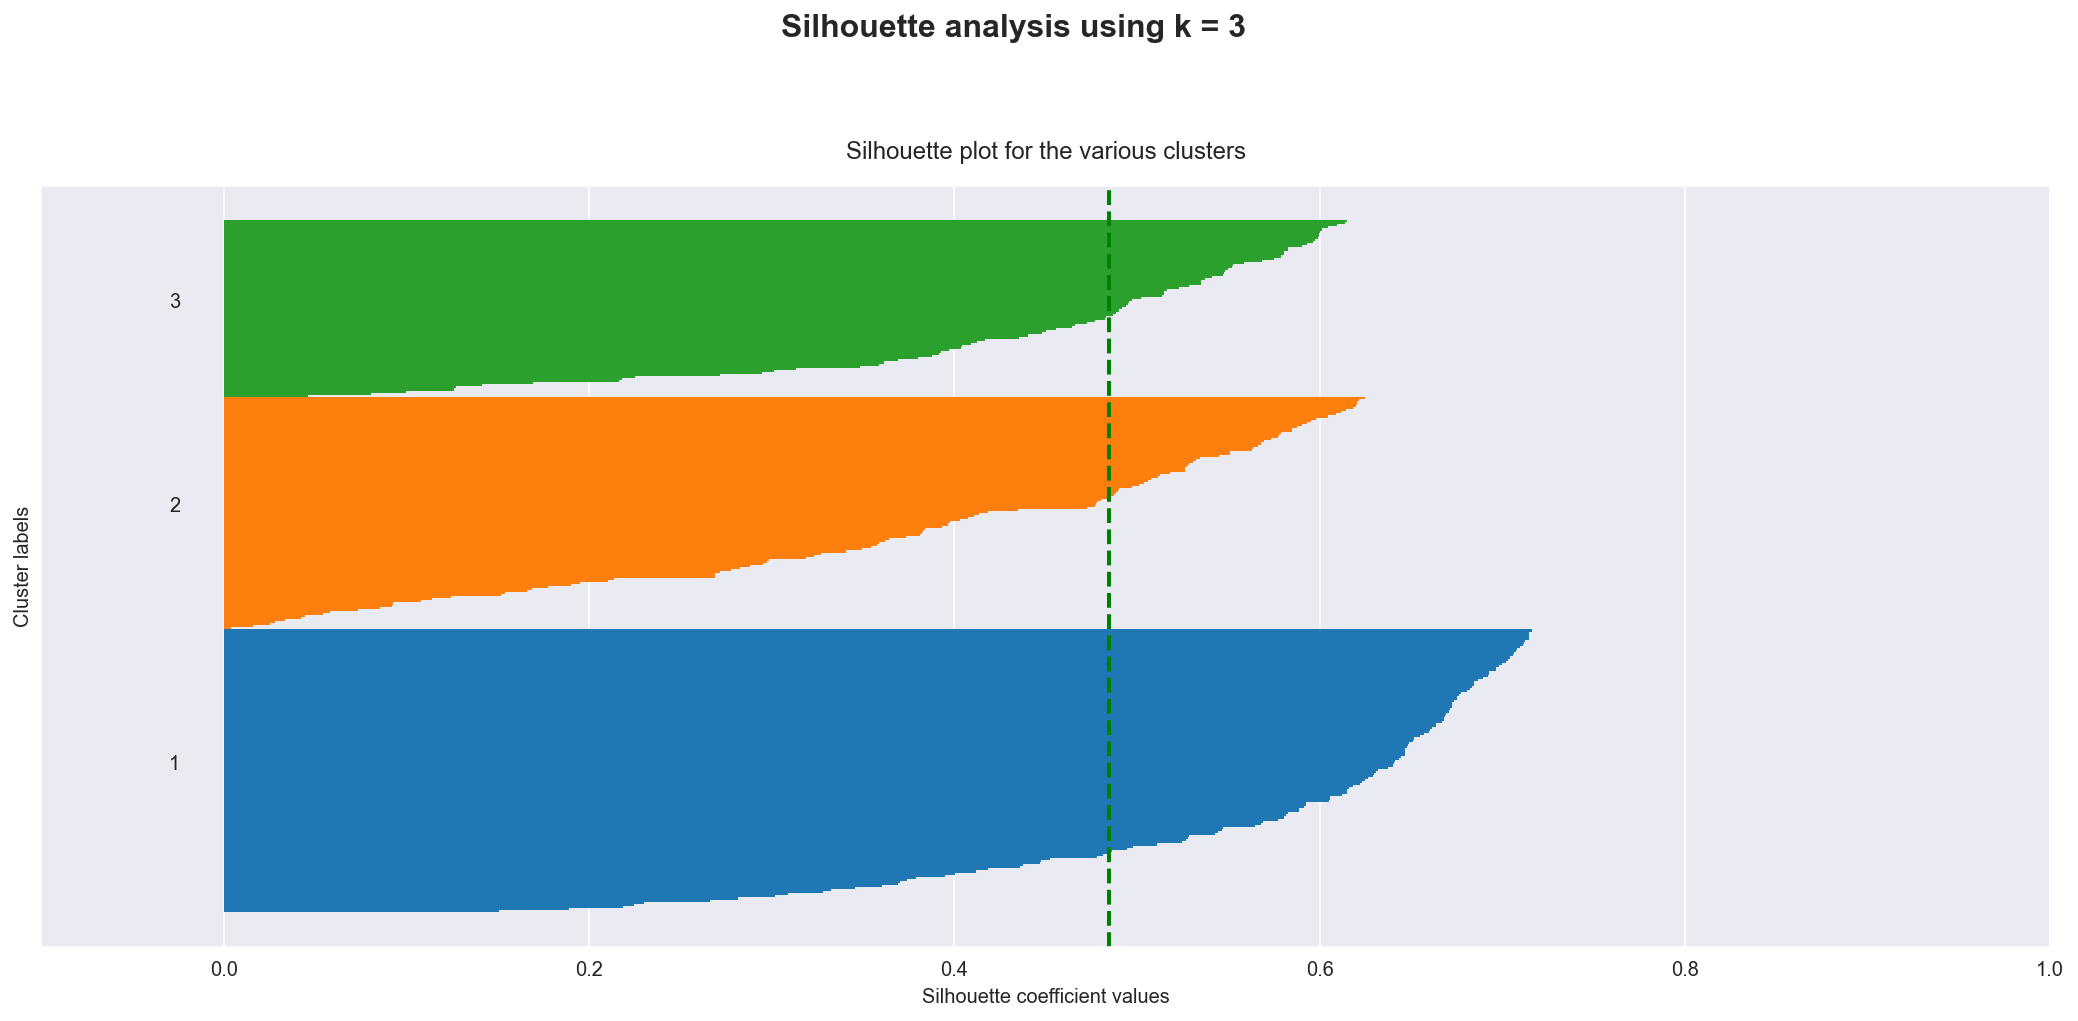

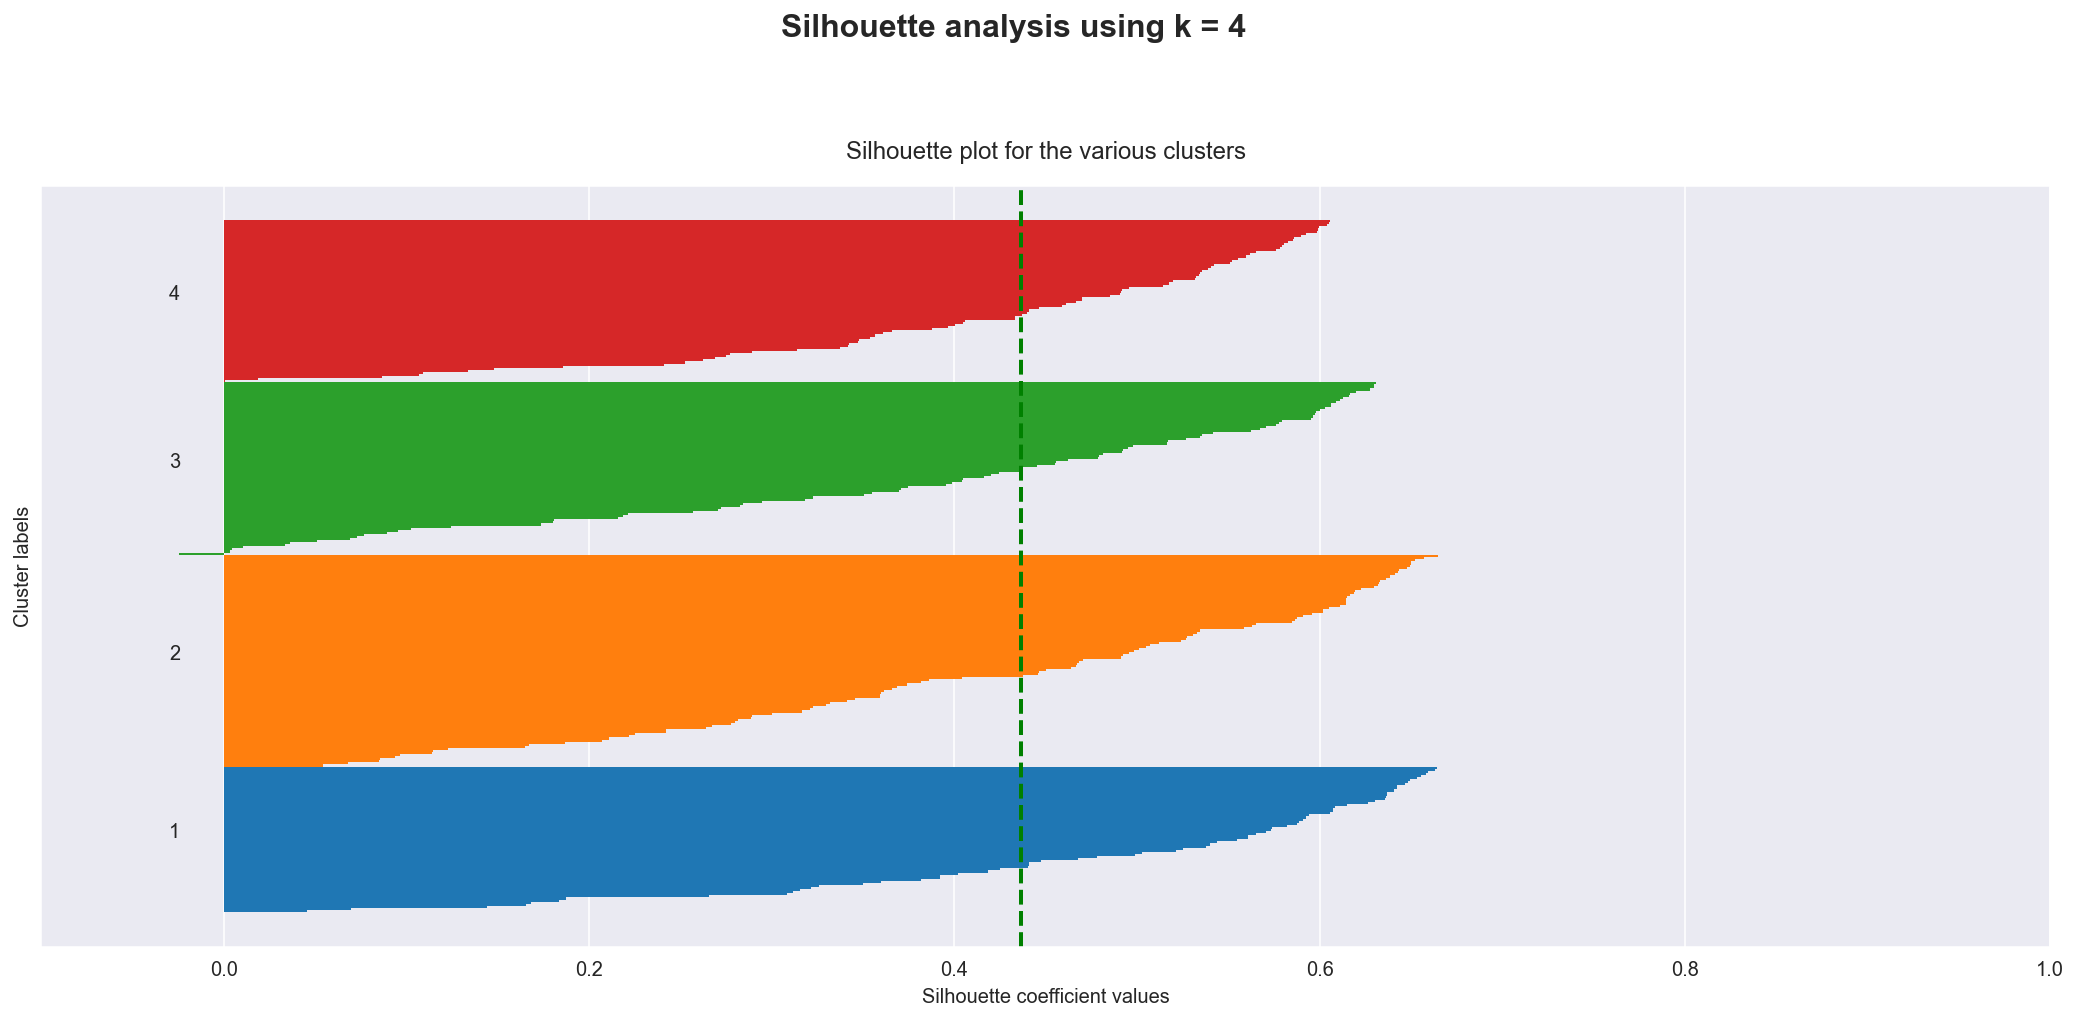

In [8]:
#Evaluate the KMeans model using silhouette samples
from sklearn.metrics import silhouette_samples
for i, k in enumerate([2, 3, 4]):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    plt.suptitle(f'Silhouette analysis using k = {k}',fontsize=16, fontweight='semibold', y=1.05);